In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import glob

from matplotlib.ticker import MaxNLocator
import matplotlib

generate_plots = True

In [59]:
df_temp = pd.read_csv("truncnorm_synthetic.csv")
df_temp["EML"] = df_temp["EML"].apply(pd.to_numeric, errors = 'coerce')
df_temp["Cost"] = df_temp["Cost"].apply(pd.to_numeric, errors = 'coerce')
df_temp["Sample"] = df_temp["Sample"].apply(pd.to_numeric, errors = 'coerce')
df_temp.head()

,Unnamed: 0,Function,Parameters,Cost,Sample,EML
0,0.0,Optimal,truncnorm,11.937459,10.0,0.000000
1,1.0,Discreet,NaN,12.975933,10.0,0.086993
2,2.0,Continuous,dgamma,12.139297,10.0,0.016908
3,3.0,Semi-clairvoyant,norm,11.958476,10.0,0.001761
4,4.0,Clairvoyant,truncnorm,12.561506,10.0,0.052276


In [60]:
df_temp[(df_temp.Function=="Continuous") & (df_temp.Sample==110)].head()

,Unnamed: 0,Function,Parameters,Cost,Sample,EML
52,52.0,Continuous,dgamma,12.099978,110.0,0.013614
148,52.0,Continuous,dgamma,12.017577,110.0,0.006711
244,52.0,Continuous,dgamma,11.946626,110.0,0.000768
340,52.0,Continuous,dgamma,12.162950,110.0,0.018889
436,52.0,Continuous,dweibull,11.939968,110.0,0.000210


In [61]:
df_optimal = df_temp[df_temp.Function=="Optimal"]
df_discreet = df_temp[df_temp.Function=="Discreet"]
df_funct = df_temp[(df_temp.Function=="Continuous") & (df_temp.Parameters!="pearson3") & (df_temp.EML!=np.inf)]
df_clarvoyant = df_temp[df_temp.Function=="Semi-clairvoyant"]

print(len(df_funct[df_funct.Parameters=="truncnorm"]))
print(len(df_funct[df_funct.Parameters=="norm"]))

0
14


In [62]:
df_funct[(df_funct.Cost>12.5) & ((df_funct.Sample==90) | (df_funct.Sample==460))].sort_values(by=['Cost'])

,Unnamed: 0,Function,Parameters,Cost,Sample,EML
3306,42.0,Continuous,beta,13.280181,90.0,0.11248


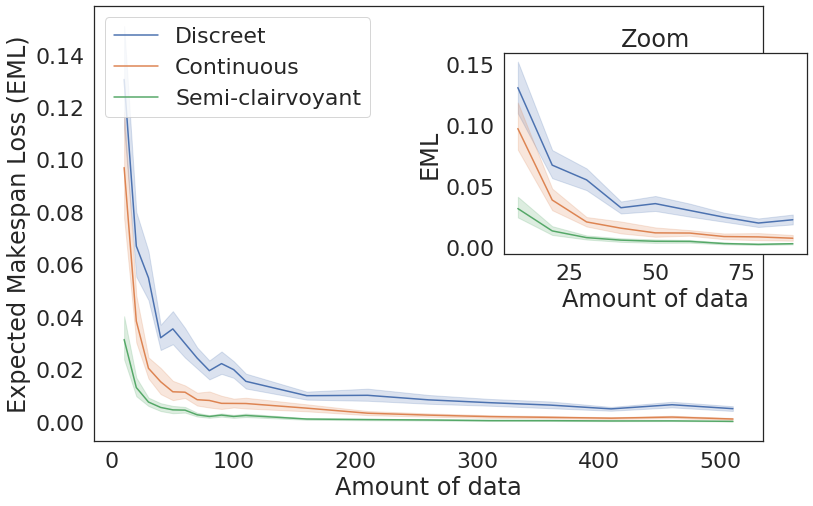

In [67]:
# plot the cost for different polynomial orders
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")

#sns.lineplot(x="Sample", y="Cost", data=df_optimal, label="Optimal", ax=ax)
sns.lineplot(x="Sample", y="EML", data=df_discreet, label="Discreet", ax=ax)
sns.lineplot(x="Sample", y="EML", data=df_funct, label="Continuous", ax=ax)
sns.lineplot(x="Sample", y="EML", data=df_clarvoyant, label="Semi-clairvoyant", ax=ax)
#ax.set(yscale="log")
ax.set_xlabel('Amount of data')
ax.set_ylabel('Expected Makespan Loss (EML)')
plt.legend(loc='upper left')

ax2 = plt.axes([0.6, 0.45, .35, .35], facecolor='w')
#sns.lineplot(x="Sample", y="Cost", data=df_optimal[df_optimal.Sample<100], ax=ax2)
sns.lineplot(x="Sample", y="EML", data=df_discreet[df_discreet.Sample<100], ax=ax2)
sns.lineplot(x="Sample", y="EML", data=df_funct[df_funct.Sample<100], ax=ax2)
sns.lineplot(x="Sample", y="EML", data=df_clarvoyant[df_clarvoyant.Sample<100], ax=ax2)
ax2.set_xlabel('Amount of data')
ax2.set_ylabel('EML')
ax2.set_title('Zoom')

plt.savefig("figures_synthetic/truncnorm_02082.png")
#ax2.set_xlim([0.9,1.])